## Types

- Binary Class : classify into two classes
- Multi Class: classify into multiple classes

## Logistic Regression

We'll be discussing binary class classification first. In this case $y\in \{0,1\}$ where 0 is negative class and 1 is positive class. Consider the example below:

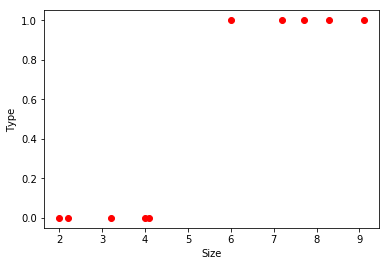

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Malignant vs Benign Tumor
size = [2, 2.2, 3.2, 4, 4.1, 6, 7.2, 7.7, 8.3, 9.1]
ttype = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]               # 1 denotes malignant, 0 denotes benign

plt.xlabel('Size')
plt.ylabel('Type')
plt.plot(size, ttype, 'ro')

Applying linear regression to the above problem,

[[-0.5009139 ]
 [ 0.18604348]]


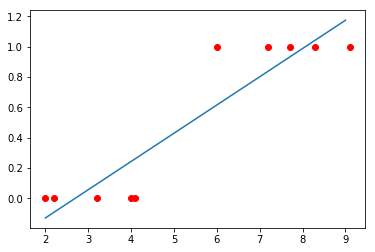

In [5]:
# Using normal equation
X = [[1, i] for i in size]
np_X = np.array(X)
np_y = np.array(ttype).reshape(len(ttype), 1)

np_theta = np.dot(np.dot(np.linalg.inv(np.dot(np_X.T, np_X)), np_X.T), np_y)
print(np_theta)

def hyp(x, t0, t1):
    return t0 + t1*x

np_x = np.linspace(2,9,10)
y = [hyp(x, np_theta[0], np_theta[1]) for x in np_x]
np_y = np.array(y)
plt.plot(size, ttype, 'ro', np_x, np_y)

On applying linear regression to the above dataset we get $h(x) = -0.5 + 0.18x$. If we take $h(x) = 0.5$ then $x = 5.55$. We can say that for $size > 5.55$ the tumor is malignant, otherwise it is benign. But what if we introduce one more training example $(15.2, 1)$

[[-0.12264704]
 [ 0.10650895]]


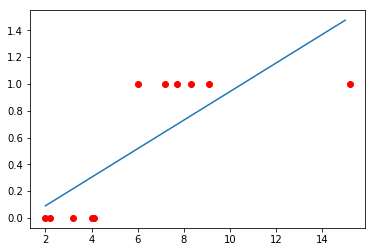

In [7]:
size = [2, 2.2, 3.2, 4, 4.1, 6, 7.2, 7.7, 8.3, 9.1, 15.2]
ttype = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] 
X = [[1, i] for i in size]
np_X = np.array(X)
np_y = np.array(ttype).reshape(len(ttype), 1)

np_theta = np.dot(np.dot(np.linalg.inv(np.dot(np_X.T, np_X)), np_X.T), np_y)
print(np_theta)

def hyp(x, t0, t1):
    return t0 + t1*x

np_x = np.linspace(2,15,10)
y = [hyp(x, np_theta[0], np_theta[1]) for x in np_x]
np_y = np.array(y)
plt.plot(size, ttype, 'ro', np_x, np_y)

This changes our hypothesis function and leads us to wrong information. So we can see that linear regression is not a great way to do classification. So we turn to logistic regression which makes sure $0 \le h(x) \le 1$
  
**Sigmoid function** is defined as
  
$$g(z) = \frac{1}{1 + e^{-z}}$$

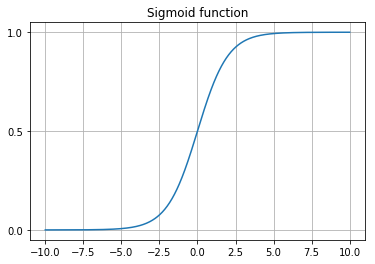

In [10]:
import math
x_ = np.linspace(-10,10,1000)
y = [1/(1 + math.exp(-z)) for z in x_]
y_ = np.array(y)

plt.title('Sigmoid function')
plt.yticks([0,0.5,1])
plt.grid(True)
plt.plot(x_,y_)

The above graph represents the sigmoid function. Note that $0 < y < 1$. So if we apply this to our hypothesis function we'll get values between 0 and 1. So the hypothesis function now is:
  
$$h(x) = g(h'(x))$$
$$h(x) = g(\theta^T x)$$
$$h(x) = \frac{1}{1 + e^{-(\theta^T x)}}$$
  
We interpret the hypothesis output as probability that $y = 1$ on input $x$. The above hypothesis can also be represented as
  
$$P(y = 1\ |\ x; \theta)$$
  
Which is read as probability that $y = 1$ given $x$ parameterised by $\theta$. Some related equations:
  
$$P(y = 1\ |\ x; \theta) + P(y = 0\ |\ x; \theta) = 1$$
$$P(y = 0\ |\ x; \theta) = 1 - P(y = 1\ |\ x; \theta)$$
  
We should predict
  
$$h(x) \ge 0.5 \rightarrow\ y = 1$$
$$h(x) < 0.5 \rightarrow\ y = 0$$
  
Also we notice that,
  
$$h(z) = h(\theta^T x) \ge 0.5\ \forall\ z \ge 0$$
$$h(z) = h(\theta^T x) < 0.5\ \forall\ z < 0.5$$
  
This means that whenever,
  
$$\theta^T x \ge 0\ \rightarrow y = 1$$
$$\theta^T x < 0\ \rightarrow y = 0$$
  
### Cost function for Logistic Regression

Let the training set be $\{(x^1, y^1), (x^2, y^2), (x^3, y^3), \ldots, (x^m, y^m)\}$. So the m examples can be written as:
  
$$x = \begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{bmatrix}
$$
  
where $x_0 = 1$ and $y \in \{0, 1\}$ and $h(x) = \frac{1}{1 + e^{\theta^T x}}$. Now we cannot use the same cost function as linear regression because our hypothesis function has changed. The cost function will not be a convex function in this case (if we use the previous square error cost function). The cost function in this case is defined as:
  
$$J(h(x), y) = -\ln(h(x))\ \forall\ y = 1$$
$$J(h(x), y) = -\ln(1 - h(x))\ \forall\ y = 0$$

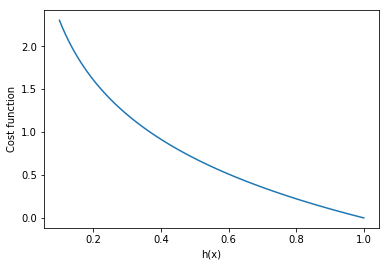

In [14]:
# Plotting the cost functions
x_cf = np.linspace(0.1,1,100)
y_cf = np.log(x_cf)*-1
plt.title('y = 1')
plt.xlabel('h(x)')
plt.ylabel('Cost function')
plt.plot(x_cf,y_cf)

c:\users\salma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


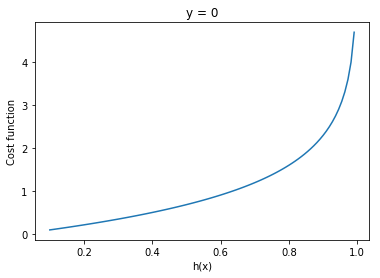

In [19]:
y_cf_2 = np.log((-1)*x_cf + 1)*-1
plt.title('y = 0')
plt.xlabel('h(x)')
plt.ylabel('Cost function')
plt.plot(x_cf,y_cf_2)

We can say that
  
$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}C(h(x^i), y^i)$$
  
Where the function C has been defined earlier. Also the above cost function can also be written as
  
$$C(h(x), y) = -y\ln(h(x)) -(1 - y)\ln(1 - h(x))$$
  
Because $y = 1$ or $y = 0$ all the times.
Now to minimise our cost function, we'll use gradient descent. More specifically,
  
$$\theta_j := \theta_j - \alpha\frac{\partial J(\theta)}{\partial\theta}$$
  
Which can be written as:
  

$$\theta_j := \theta_j - \alpha\sum_{i=1}^{m}(h(x^i) - y^i)x_j^i$$

## Multiclass Classification
We convert the multiclass classfication problem (classifying into $k$ classes) as $k$ binary classifications. We pick a class i as positive class, and the rest as negative. We do this in turn for every class. Let $y\in {0,1,2,\ldots,n}$. We divide our problem into $n+1$ binary classifications.

  
$$h_\theta^0(x)=P(y=0\ |\ x;\theta)$$
$$h_\theta^1(x)=P(y=1\ |\ x;\theta)$$
$$\vdots$$
$$h_\theta^n(x)=P(y=n\ |\ x;\theta)$$
$$prediction=max(h_\theta^i(x))$$

## Overfitting